In [10]:
import pandas as pd
import numpy as np

In [187]:
df=pd.read_excel('NLP_Assignment1_Online Retail.xlsx')

In [188]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [277]:
p=pd.read_excel('NLP_Assignment1_Online Retail.xlsx')

In [278]:
p.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [280]:
p.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [281]:
p.columns.to_series().groupby(p.dtypes).groups

{int64: ['Quantity'], datetime64[ns]: ['InvoiceDate'], float64: ['UnitPrice', 'CustomerID'], object: ['InvoiceNo', 'StockCode', 'Description', 'Country']}

In [282]:
p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [284]:
p.isna().any()

InvoiceNo      False
StockCode      False
Description     True
Quantity       False
InvoiceDate    False
UnitPrice      False
CustomerID      True
Country        False
dtype: bool

In [191]:
x=df.groupby('InvoiceNo')

In [192]:
df['CustomerID'] = df.groupby('InvoiceNo')['CustomerID'].transform(lambda grp: grp.fillna(grp.mode()))

In [193]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1455
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
Target              0
TokensDesc       1455
dtype: int64

In [194]:
max(df['CustomerID'])

18287.0

In [195]:
df=df[df['CustomerID'].notna()]

In [196]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [197]:
start_date = '2010-12-01'
end_date = '2011-08-31'
train = (df['InvoiceDate'] > start_date) & (df['InvoiceDate'] <= end_date)

In [198]:
#Sep 2011 to Dec 2011 
start_date = '2011-09-01'
end_date = '2011-12-01'
afterp = (df['InvoiceDate'] >= start_date) & (df['InvoiceDate'] <= end_date)

In [199]:
afterp

0         False
1         False
2         False
3         False
4         False
          ...  
541904    False
541905    False
541906    False
541907    False
541908    False
Name: InvoiceDate, Length: 406829, dtype: bool

In [200]:
p.groupby('CustomerID')['InvoiceNo'].unique()

CustomerID
12346.0                                    [541431, C541433]
12347.0    [537626, 542237, 549222, 556201, 562032, 57351...
12348.0                     [539318, 541998, 548955, 568172]
12349.0                                             [577609]
12350.0                                             [543037]
                                 ...                        
18280.0                                             [545712]
18281.0                                             [556464]
18282.0                            [562525, C562808, 580173]
18283.0    [540350, 541854, 545079, 550957, 554157, 55673...
18287.0                             [554065, 570715, 573167]
Name: InvoiceNo, Length: 4372, dtype: object

In [201]:
before=df[train]['CustomerID'].unique()#aug-dec

In [202]:
after=df[afterp]['CustomerID'].unique()#sep-dec

In [203]:
churn=list(set(before)-set(after))

In [204]:
df['isChurn'] = df['CustomerID'].apply(lambda x: 'Churn' if x in churn else 'Not Churn')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [205]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Target,TokensDesc,isChurn
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Churn,white hanging heart t-light holder,Churn
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Churn,white metal lantern,Churn
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Churn,cream cupid hearts coat hanger,Churn
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Churn,knitted union flag hot water bottle,Churn
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Churn,red woolly hottie white heart.,Churn


In [206]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
Target         0
TokensDesc     0
isChurn        0
dtype: int64

In [207]:
df['Target']=df['isChurn']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [208]:
df.drop('isChurn', axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [209]:
start_date = '2010-12-01'
end_date = '2011-08-31'
train = df[(df['InvoiceDate'] > start_date) & (df['InvoiceDate'] <= end_date)]

In [210]:
#Sep 2011 to Dec 2011 
start_date = '2011-09-01'
end_date = '2011-12-01'
test = df[(df['InvoiceDate'] >= start_date) & (df['InvoiceDate'] <= end_date)]

In [211]:
l=df['Description'].unique()

In [212]:
len(l)

3896

In [288]:
df[df['Target']=='Churn'].count()

InvoiceNo      50510
StockCode      50510
Description    50510
Quantity       50510
InvoiceDate    50510
UnitPrice      50510
CustomerID     50510
Country        50510
Target         50510
TokensDesc     50510
label          50510
dtype: int64

In [289]:
df[df['Target']=='Not Churn'].count()

InvoiceNo      356319
StockCode      356319
Description    356319
Quantity       356319
InvoiceDate    356319
UnitPrice      356319
CustomerID     356319
Country        356319
Target         356319
TokensDesc     356319
label          356319
dtype: int64

In [213]:
x=df.groupby('Target')

In [214]:
print(x.get_group('Churn')['Description'].unique())

['white hanging heart t-light holder' 'white metal lantern'
 'cream cupid hearts coat hanger' ... 'new baroque jewellery box '
 'paperweight save the planet' 'paper craft , little birdie']


In [131]:
!pip install nltk

In [135]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [137]:
pip install python-Levenshtein

     |████████████████████████████████| 50 kB 4.0 MB/s 
  Created wheel for python-Levenshtein: filename=python_Levenshtein-0.12.2-cp37-cp37m-linux_x86_64.whl size=149878 sha256=a3c482cb44126238a2158e9e4e9ee94c0d553827ea244ba6f4f57ca137a4f605
  Stored in directory: /root/.cache/pip/wheels/05/5f/ca/7c4367734892581bb5ff896f15027a932c551080b2abd3e00d
Successfully built python-Levenshtein


In [138]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [139]:
import nltk
from nltk.corpus import stopwords

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [215]:
stop_words = set(stopwords.words('english'))

In [169]:
type(df['Description'][0])

str

In [172]:
df['Description']=df['Description'].str.lower()

In [185]:
set(word_tokenize(df['Description'][10300]))-stop_words

{'chart', 'height', 'stickers', 'woodland'}

In [226]:
df['TokensDesc']=df.apply(lambda x: set(word_tokenize(x['Description']))-stop_words, axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [217]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Target,TokensDesc
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Churn,"[white, hanging, heart, t-light, holder]"
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Churn,"[white, metal, lantern]"
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Churn,"[cream, cupid, hearts, coat, hanger]"
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Churn,"[knitted, union, flag, hot, water, bottle]"
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Churn,"[red, woolly, hottie, white, heart, .]"


In [220]:
one_hot_country = pd.get_dummies(df['Country'])

In [221]:
one_hot_country

,Australia,Austria,Bahrain,Belgium,Brazil,Canada,Channel Islands,Cyprus,Czech Republic,Denmark,EIRE,European Community,Finland,France,Germany,Greece,Iceland,Israel,Italy,Japan,Lebanon,Lithuania,Malta,Netherlands,Norway,Poland,Portugal,RSA,Saudi Arabia,Singapore,Spain,Sweden,Switzerland,USA,United Arab Emirates,United Kingdom,Unspecified
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
541905,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
541906,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
541907,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [223]:
#1-Churn
#0- Not Churn
df['label'] = df['Target'].apply(lambda x: 1 if x=='Churn' else 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [224]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Target,TokensDesc,label
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Churn,"[white, hanging, heart, t-light, holder]",1
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Churn,"[white, metal, lantern]",1
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Churn,"[cream, cupid, hearts, coat, hanger]",1
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Churn,"[knitted, union, flag, hot, water, bottle]",1
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Churn,"[red, woolly, hottie, white, heart, .]",1
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,pack of 20 spaceboy napkins,12,2011-12-09 12:50:00,0.85,12680.0,France,Not Churn,"[pack, of, 20, spaceboy, napkins]",0
541905,581587,22899,children's apron dolly girl,6,2011-12-09 12:50:00,2.10,12680.0,France,Not Churn,"[children, 's, apron, dolly, girl]",0
541906,581587,23254,childrens cutlery dolly girl,4,2011-12-09 12:50:00,4.15,12680.0,France,Not Churn,"[childrens, cutlery, dolly, girl]",0
541907,581587,23255,childrens cutlery circus parade,4,2011-12-09 12:50:00,4.15,12680.0,France,Not Churn,"[childrens, cutlery, circus, parade]",0


In [229]:
df['TokensDesc']

0           {heart, holder, t-light, hanging, white}
1                            {lantern, white, metal}
2               {hanger, cupid, hearts, cream, coat}
3         {knitted, water, flag, union, bottle, hot}
4             {heart, hottie, woolly, red, ., white}
                             ...                    
541904                 {pack, napkins, spaceboy, 20}
541905            {dolly, apron, 's, girl, children}
541906             {dolly, childrens, girl, cutlery}
541907          {circus, childrens, parade, cutlery}
541908            {set, baking, retrospot, 9, piece}
Name: TokensDesc, Length: 406829, dtype: object

In [236]:
df1=df.copy(deep=True)

In [237]:
id(df),id(df1)

(140438868700560, 140438863489232)

In [238]:
df1.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Target', 'TokensDesc', 'label'],
      dtype='object')

In [239]:
df1.drop(['Description','Target','TokensDesc'], axis=1, inplace=True)

In [244]:
onehot=pd.get_dummies(df1['Country'])

In [246]:
onehot.columns

Index(['Australia', 'Austria', 'Bahrain', 'Belgium', 'Brazil', 'Canada',
       'Channel Islands', 'Cyprus', 'Czech Republic', 'Denmark', 'EIRE',
       'European Community', 'Finland', 'France', 'Germany', 'Greece',
       'Iceland', 'Israel', 'Italy', 'Japan', 'Lebanon', 'Lithuania', 'Malta',
       'Netherlands', 'Norway', 'Poland', 'Portugal', 'RSA', 'Saudi Arabia',
       'Singapore', 'Spain', 'Sweden', 'Switzerland', 'USA',
       'United Arab Emirates', 'United Kingdom', 'Unspecified'],
      dtype='object')

In [247]:
for i in onehot.columns:
  df1[i]=onehot[i]

In [249]:
df1.drop(['InvoiceNo',], axis=1, inplace=True)

In [250]:
df1.columns

Index(['StockCode', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID',
       'Country', 'label', 'Australia', 'Austria', 'Bahrain', 'Belgium',
       'Brazil', 'Canada', 'Channel Islands', 'Cyprus', 'Czech Republic',
       'Denmark', 'EIRE', 'European Community', 'Finland', 'France', 'Germany',
       'Greece', 'Iceland', 'Israel', 'Italy', 'Japan', 'Lebanon', 'Lithuania',
       'Malta', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'RSA',
       'Saudi Arabia', 'Singapore', 'Spain', 'Sweden', 'Switzerland', 'USA',
       'United Arab Emirates', 'United Kingdom', 'Unspecified'],
      dtype='object')

In [253]:
uniquestock=df1['StockCode'].unique()
z=[i for i in range(len(uniquestock))]

uniquestock=list(uniquestock)

df1['StockCode'].replace(uniquestock,
                        z, inplace=True)


In [258]:
country=df['Country'].unique()
z=[i for i in range(len(country))]

country=list(country)

df['Country'].replace(country,
                        z, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [264]:
df1['Country']=df['Country']

In [266]:
df1['label']=df['label']

In [261]:
df1.drop(['Australia', 'Austria', 'Bahrain', 'Belgium',
       'Brazil', 'Canada', 'Channel Islands', 'Cyprus', 'Czech Republic',
       'Denmark', 'EIRE', 'European Community', 'Finland', 'France', 'Germany',
       'Greece', 'Iceland', 'Israel', 'Italy', 'Japan', 'Lebanon', 'Lithuania',
       'Malta', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'RSA',
       'Saudi Arabia', 'Singapore', 'Spain', 'Sweden', 'Switzerland', 'USA',
       'United Arab Emirates', 'United Kingdom', 'Unspecified'], axis=1, inplace=True)

In [267]:
df1

,StockCode,Quantity,UnitPrice,CustomerID,Country,label
0,0,6,2.55,17850.0,0,1
1,1,6,3.39,17850.0,0,1
2,2,8,2.75,17850.0,0,1
3,3,6,3.39,17850.0,0,1
4,4,6,3.39,17850.0,0,1
...,...,...,...,...,...,...
541904,1852,12,0.85,12680.0,1,0
541905,415,6,2.10,12680.0,1,0
541906,2909,4,4.15,12680.0,1,0
541907,2912,4,4.15,12680.0,1,0


In [274]:
pip install seaborn

            StockCode  Quantity  UnitPrice  CustomerID   Country     label
StockCode    1.000000 -0.002011  -0.002399    0.000944  0.000131 -0.062359
Quantity    -0.002011  1.000000  -0.001238   -0.003600  0.006014 -0.003303
UnitPrice   -0.002399 -0.001238   1.000000   -0.004560  0.010783  0.005425
CustomerID   0.000944 -0.003600  -0.004560    1.000000 -0.288658  0.030213
Country      0.000131  0.006014   0.010783   -0.288658  1.000000  0.043899
label       -0.062359 -0.003303   0.005425    0.030213  0.043899  1.000000


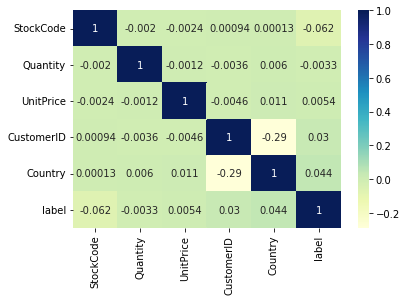

In [275]:

# import modules
import matplotlib.pyplot as mp
import pandas as pd
import seaborn as sb

# prints data that will be plotted
# columns shown here are selected by corr() since
# they are ideal for the plot
print(df1.corr())
  
# plotting correlation heatmap
dataplot = sb.heatmap(df1.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
mp.show()

In [268]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df1.loc[:, df1.columns != 'label'], df1['label'], test_size=0.25, random_state=0)

from sklearn.linear_model import LogisticRegression

# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()

logisticRegr.fit(x_train, y_train)

LogisticRegression()

In [271]:
# Returns a NumPy Array
# Predict for One Observation (image)
logisticRegr.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0])

In [272]:
score = logisticRegr.score(x_test, y_test)
print(score)

0.8759291304518818
